In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyesg 
from evaluation import fanchart

In [11]:
acwi = pd.read_csv('acwi_25.08.23.csv')
acwi.index = pd.DatetimeIndex(acwi['Date'])

<AxesSubplot:xlabel='Date'>

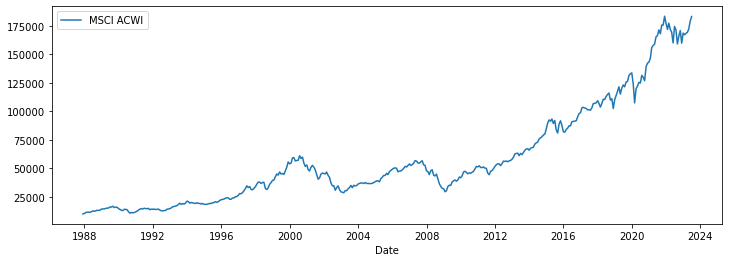

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=acwi,ax=ax)

In [90]:
acwi_returns = np.log(acwi['MSCI ACWI']/acwi['MSCI ACWI'].shift(1)).loc['1994-01-01':]
acwi_returns.describe()

count    355.000000
mean       0.006299
std        0.042396
min       -0.155028
25%       -0.013693
50%        0.011209
75%        0.033424
max        0.114884
Name: MSCI ACWI, dtype: float64

In [91]:
annualized_mean = acwi_returns.mean() * 12
annualized_std = acwi_returns.std() * np.sqrt(12)
print(annualized_mean)
print(annualized_std)

0.07558256759399751
0.14686330930066238


In [34]:
ann_ret = np.log(acwi['MSCI ACWI']/acwi['MSCI ACWI'].shift(12)).loc['1994-01-01':]
ann_ret.describe()

count    355.000000
mean       0.076830
std        0.174893
min       -0.492778
25%        0.003215
50%        0.105590
75%        0.189558
max        0.433882
Name: MSCI ACWI, dtype: float64

In [53]:
model = pyesg.GeometricBrownianMotion(mu=0.073,sigma=0.17)
scenarios = model.scenarios(100,1,600,20)

In [54]:
np.savetxt('acwi_scenarios.csv', scenarios)

In [55]:
perc = np.percentile(scenarios,[1,5,25,50,75,95,99],axis=0)
#fanchart(None, perc)

In [60]:
def percentile_summary(perc):
    perc_dict = {'perc': ['1','5','25','50','75','95','99'],
                 '1': perc[:,1],
                 '2': perc[:,2],
                 '3': perc[:,3],
                 '5': perc[:,5],
                 '10': perc[:,10],
                 '15': perc[:,15],
                 '20': perc[:,20]
                 }
    
    perc_summary = pd.DataFrame(perc_dict)
    perc_summary.set_index('perc', inplace=True)
    return perc_summary
percentile_summary(perc)

,1,2,3,5,10,15,20
perc,,,,,,,
1,71.433490,65.590273,61.704471,57.604493,55.411506,58.220588,69.780216
5,79.923764,77.219288,74.731849,74.398758,78.298002,89.944130,99.437853
25,93.915607,95.760189,98.682515,107.639268,125.846948,162.514832,194.592241
50,106.009369,113.768314,121.812406,137.995997,179.595840,241.208376,341.372956
75,119.142104,133.803187,146.637709,172.717452,252.605723,371.116352,547.694153
95,139.821551,163.055562,181.539975,235.268887,409.588129,731.705488,1210.038356
99,153.871682,189.817241,232.309840,291.915283,563.065005,966.926987,1850.834165


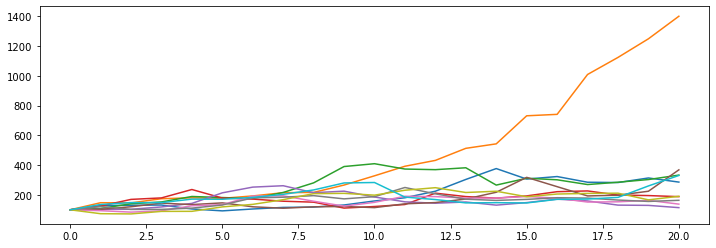

In [76]:
ax,fig = plt.subplots(figsize=(12,4))
for i in np.random.randint(0,600,10):
    sns.lineplot(data=scenarios[i])

In [73]:
T = 20
cagr = (scenarios[:,T]/scenarios[:,0])**(1/T)-1


In [74]:
np.percentile(cagr,[1,5,25,50,75,95,99])

array([-0.01783154, -0.00028187,  0.03384672,  0.06331372,  0.08874679,
        0.13276531,  0.15709324])

In [81]:
below_zero = np.round(np.count_nonzero(scenarios<100,axis=0)/600,2)